**Table of contents**<a id='toc0_'></a>    
- [Test different classifiers ](#toc1_)    
  - [Testing different parameter settings ](#toc1_1_) 
    - [Majority vote: Combine classifiers](#toc1_2_)    
    - [Meta Learner](#toc1_3_)   
    - [Run on dev data](#toc1_4_)  
- [Aggregrate texts to larger text inputs](#toc2_) 
    - [Apply the same procedure with our augmented dataset](#toc1_1_) 
      - [Without text cleaning ](#toc1_2_)    
      - [with balanced augmented dataset](#toc1_3_)   


In [1]:
! pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 469.0/469.0 KB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 KB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 34.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 KB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.9/132.9 KB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.8/199.8 KB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 KB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 KB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 KB 11.3 MB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd
from tqdm import tqdm

import re
import string
import csv

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer  

from datasets import load_dataset

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report, ConfusionMatrixDisplay
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import MultinomialNB

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train_data = load_dataset("csv", 
                  data_files="https://raw.githubusercontent.com/WiebkePetersen/hhuEDOS2023/main/dataset/train/train_all_tasks.csv") 

dev_data = load_dataset("csv",
                  data_files="https://raw.githubusercontent.com/WiebkePetersen/hhuEDOS2023/main/dataset/dev/dev_task_a_entries.csv")

test_data = load_dataset("csv", 
                  data_files="https://raw.githubusercontent.com/WiebkePetersen/hhuEDOS2023/main/dataset/test/test_task_a_entries.csv")


datadict = train_data
datadict = datadict.rename_column("label_sexist", "label")
datadict = datadict["train"].train_test_split(shuffle=True, test_size=0.1, seed=42)
datadict.set_format(type='pandas')
mytrain = datadict['train'][:]
mytest = datadict['test'][:]
datadict.reset_format()

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Dataset csv downloaded and prepared to /root/.cache/huggingface/datasets/csv/default-422afdb88b6ac8bb/0.0.0/6b34fb8fcf56f7c8ba51dc895bfa2bfbe43546f190a60fcf74bb5e8afdcc2317. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Dataset csv downloaded and prepared to /root/.cache/huggingface/datasets/csv/default-da1164661b92ae4a/0.0.0/6b34fb8fcf56f7c8ba51dc895bfa2bfbe43546f190a60fcf74bb5e8afdcc2317. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Dataset csv downloaded and prepared to /root/.cache/huggingface/datasets/csv/default-b18d89f063a4d6ee/0.0.0/6b34fb8fcf56f7c8ba51dc895bfa2bfbe43546f190a60fcf74bb5e8afdcc2317. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

In [25]:
mytrain.head()

,rewire_id,text,label,label_category,label_vector
0,sexism2022_english-15060,Some people are still so stupid they try to ap...,not sexist,none,none
1,sexism2022_english-8965,No frantic women! No matter what you do it wil...,sexist,2. derogation,2.1 descriptive attacks
2,sexism2022_english-2320,Yeah drinks would be a good follow up especial...,not sexist,none,none
3,sexism2022_english-15637,"""ching chang ching choke on a dong"" Fucking KEK.",not sexist,none,none
4,sexism2022_english-747,"The death of children's author Enid Blyton, 28...",not sexist,none,none


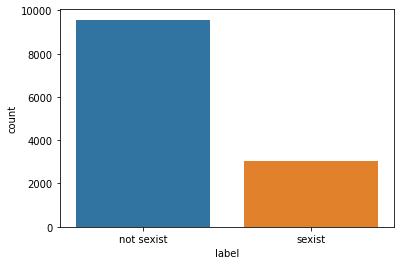

In [ ]:
ax = sns.countplot(x="label", data=mytrain)

In [11]:
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [12]:
sw = stopwords.words('english')
lemmatizer = WordNetLemmatizer() 

def clean_text(text):
    """
    removes urls, html tags, emojis, punctuations, stopwords, lemmatizes
    text: a string
    """

    text = text.lower()
    
    text = re.sub(r"[^a-zA-Z?.!,¿]+", " ", text) # replacing everything with space except (a-z, A-Z, ".", "?", "!", ",")

    text = re.sub(r"http\S+", "",text) #Removing URLs 
    #text = re.sub(r"http", "",text)
    
    html=re.compile(r'<.*?>') 
    
    text = html.sub(r'',text) #Removing html tags
    
    punctuations = '@#!?+&*[]-%.:/();$=><|{}^' + "'`" + '_'
    for p in punctuations:
        text = text.replace(p,'') #Removing punctuations
        
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    
    text = [lemmatizer.lemmatize(word) for word in text]
    
    text = " ".join(text) #removing stopwords
    
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text) #Removing emojis
    
    return text

In [26]:
mytrain['text'] = mytrain['text'].apply(lambda x: clean_text(x))
mytest['text'] = mytest['text'].apply(lambda x: clean_text(x))
 
mytrain.head()

,rewire_id,text,label,label_category,label_vector
0,sexism2022_english-15060,people still stupid try appease violent savage...,not sexist,none,none
1,sexism2022_english-8965,frantic woman matter cause trouble pain anxiet...,sexist,2. derogation,2.1 descriptive attacks
2,sexism2022_english-2320,yeah drink would good follow especially sit ne...,not sexist,none,none
3,sexism2022_english-15637,ching chang ching choke dong fucking kek,not sexist,none,none
4,sexism2022_english-747,"death child author enid blyton, th november ma...",not sexist,none,none


In [27]:
X_train = mytrain['text']
y_train = mytrain['label']
X_test = mytest['text']
y_test = mytest['label']

In [28]:
# Feature extraction

tfidf_vectorizer = TfidfVectorizer() 

tfidf_train_vectors = tfidf_vectorizer.fit_transform(X_train)

tfidf_test_vectors = tfidf_vectorizer.transform(X_test)

In [29]:
tfidf_test_vectors.shape

(1400, 18385)

# Test different classifiers



In [ ]:
def plot_confusion_matrix(y_true, y_preds, labels, normalize):
    """Plots a confusion matrix with the given labels and normalization option.
    Args:
        y_true (list): List of true labels.
        y_preds (list): List of predicted labels.
        labels (list): List of labels to include in the confusion matrix.
        normalize (str): Normalization option. Can be one of "true", "pred", "all", or None.
    """
    cm = confusion_matrix(y_true, y_preds, normalize=normalize)
    fig, ax = plt.subplots(figsize=(6, 6))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap="Blues", values_format=".2f", ax=ax, colorbar=False)
    plt.title("Confusion matrix")
    plt.show()


In [23]:
# Pipeline to classify data

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression

myX_prob = pd.DataFrame()
myX_pred = pd.DataFrame()
overview_f1macro = pd.DataFrame()

def test_classifiers(names, classifiers,overview_f1macro,myX_prob,myX_pred):
    """
    Tests a list of classifiers and prints the accuracy score and classification report.
    Args:
        names (list): List of classifier names.
        classifiers (list): List of classifiers.
        myX_prob (pd.Dataframe): Dataframe to store the probabilities of the predictions of the classifiers.
        myX_pred (pd.Dataframe): Dataframe to store the predictions of the classifiers.
    Returns:
        overview_f1macro (pd.Dataframe): Overview of F1 macro score, accuracy, precision and recall.
        myX_prob (pd.Dataframe): Dataframe to store the probabilities of the predictions of the classifiers.
        myX_pred (pd.Dataframe): Dataframe to store the predictions of the classifiers.
    """
    for name, clf in zip(names, classifiers):
        clf.fit(tfidf_train_vectors, y_train)
        myX_prob[name+"_class0"] = clf.predict_proba(tfidf_test_vectors)[:,0]
        myX_pred[name+"_pred"] = clf.predict(tfidf_test_vectors)
        score = clf.score(tfidf_test_vectors, y_test)
        print(name, score)
        y_pred = clf.predict(tfidf_test_vectors)
        overview_f1macro[name+"_f1macro"] = [classification_report(y_test,y_pred).split()[-8]]
        print(classification_report(y_test,y_pred))
        labels = [0,1]
        plot_confusion_matrix(y_test, y_pred, labels, "true")
        plot_confusion_matrix(y_test, y_pred, labels, None)
    return overview_f1macro,myX_prob,myX_pred


In [22]:
names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM", 
    "Decision Tree",
    "Random Forest",
    "AdaBoost",
    "LogisticRegression",
]

classifiers = [
    KNeighborsClassifier(),
    SVC(kernel="linear", C=0.025, probability=True),
    SVC(gamma=2, C=1, probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    LogisticRegression(),
]

overview_f1macro, myX_prob, myX_pred = test_classifiers(names, classifiers, overview_f1macro, myX_prob, myX_pred)


NameError: ignored

In [ ]:
overview_f1macro

,Nearest Neighbors_f1macro,Linear SVM_f1macro,RBF SVM_f1macro,Decision Tree_f1macro,Random Forest_f1macro,AdaBoost_f1macro,LogisticRegression_f1macro
0,0.43,0.43,0.59,0.69,0.70,0.73,0.68


In [ ]:
myX_prob.head()

,Nearest Neighbors_class0,Linear SVM_class0,RBF SVM_class0,Decision Tree_class0,Random Forest_class0,AdaBoost_class0,LogisticRegression_class0
0,1.0,0.691340,0.616706,1.0,0.74,0.504594,0.629957
1,1.0,0.840302,0.922706,1.0,0.95,0.515609,0.892169
2,1.0,0.843037,0.914407,1.0,0.95,0.510980,0.869437
3,1.0,0.899065,0.945222,0.0,0.96,0.515609,0.910652
4,1.0,0.857114,0.867144,0.0,0.73,0.504069,0.789967


In [ ]:
myX_pred.head()

,Nearest Neighbors_pred,Linear SVM_pred,RBF SVM_pred,Decision Tree_pred,Random Forest_pred,AdaBoost_pred,LogisticRegression_pred
0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0
4,0,0,0,1,0,0,0


## Testing different parameter settings 

AdaBoost10 0.8071428571428572
              precision    recall  f1-score   support

           0       0.80      0.99      0.88      1037
           1       0.88      0.30      0.44       363

    accuracy                           0.81      1400
   macro avg       0.84      0.64      0.66      1400
weighted avg       0.82      0.81      0.77      1400



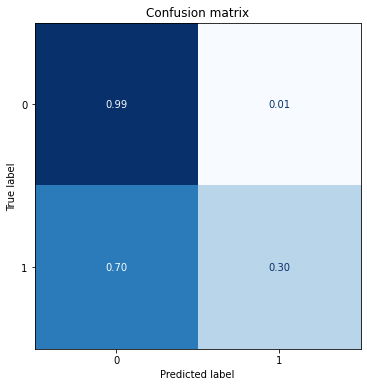

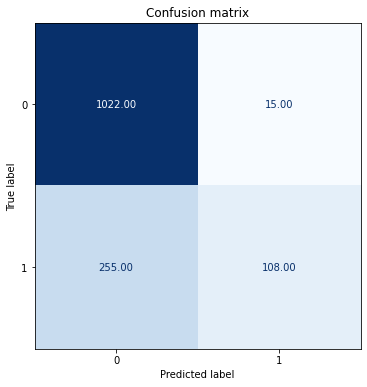

AdaBoost20 0.8214285714285714
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      1037
           1       0.84      0.39      0.53       363

    accuracy                           0.82      1400
   macro avg       0.83      0.68      0.71      1400
weighted avg       0.82      0.82      0.80      1400



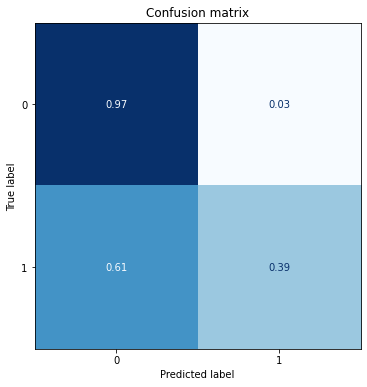

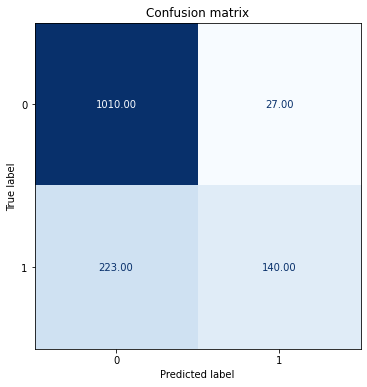

AdaBoost50 0.83
              precision    recall  f1-score   support

           0       0.83      0.97      0.89      1037
           1       0.85      0.42      0.56       363

    accuracy                           0.83      1400
   macro avg       0.84      0.70      0.73      1400
weighted avg       0.83      0.83      0.81      1400



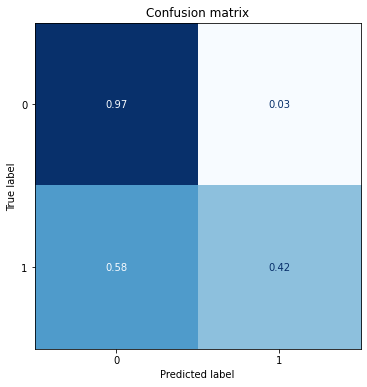

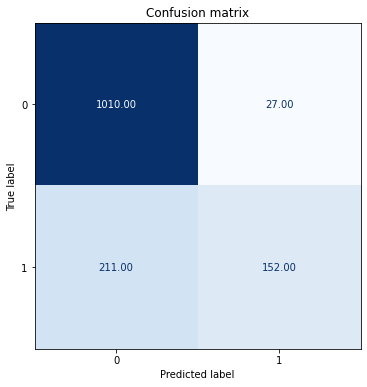

AdaBoost100 0.8314285714285714
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1037
           1       0.82      0.45      0.58       363

    accuracy                           0.83      1400
   macro avg       0.82      0.71      0.74      1400
weighted avg       0.83      0.83      0.81      1400



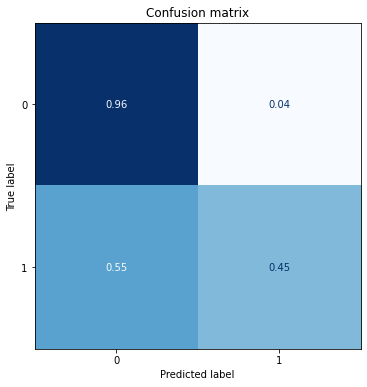

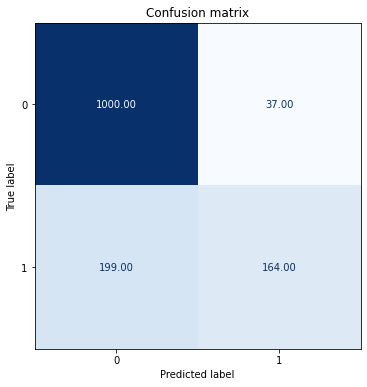

AdaBoost250 0.8235714285714286
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      1037
           1       0.75      0.48      0.59       363

    accuracy                           0.82      1400
   macro avg       0.79      0.71      0.74      1400
weighted avg       0.82      0.82      0.81      1400



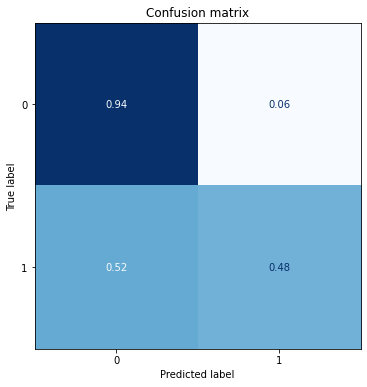

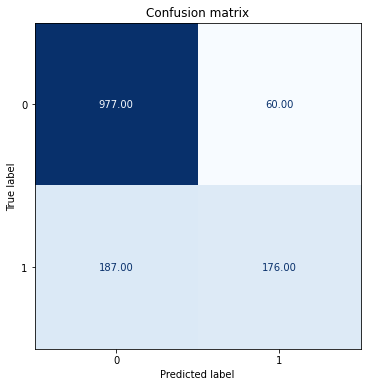

AdaBoost500 0.8264285714285714
              precision    recall  f1-score   support

           0       0.85      0.93      0.89      1037
           1       0.73      0.52      0.61       363

    accuracy                           0.83      1400
   macro avg       0.79      0.73      0.75      1400
weighted avg       0.82      0.83      0.82      1400



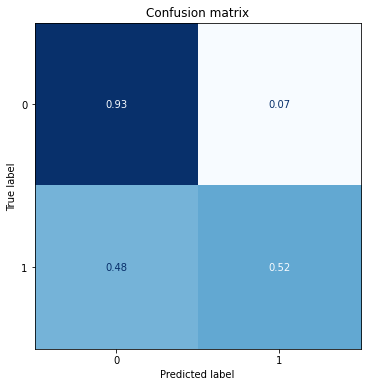

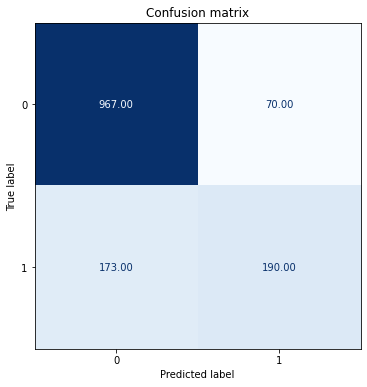

In [ ]:
# Ada boost classifier

names = [
    "AdaBoost10",
    "AdaBoost20",
    "AdaBoost50",
    "AdaBoost100",
    "AdaBoost250",
    "AdaBoost500",
    "AdaBoost750",
    "AdaBoost1000",
    "AdaBoost1250",
    "AdaBoost1500",
]

classifiers = [
    AdaBoostClassifier(n_estimators=10),
    AdaBoostClassifier(n_estimators=20),
    AdaBoostClassifier(n_estimators=50),
    AdaBoostClassifier(n_estimators=100),
    AdaBoostClassifier(n_estimators=250),
    AdaBoostClassifier(n_estimators=500),
    AdaBoostClassifier(n_estimators=750),
    AdaBoostClassifier(n_estimators=1000),
    AdaBoostClassifier(n_estimators=1250),
    AdaBoostClassifier(n_estimators=1500),
]

overview_f1macro, myX_prob, myX_pred = test_classifiers(names, classifiers, overview_f1macro, myX_prob, myX_pred)


Random Forest 25 0.8221428571428572
              precision    recall  f1-score   support

           0       0.81      0.99      0.89      1037
           1       0.90      0.36      0.51       363

    accuracy                           0.82      1400
   macro avg       0.85      0.67      0.70      1400
weighted avg       0.83      0.82      0.79      1400



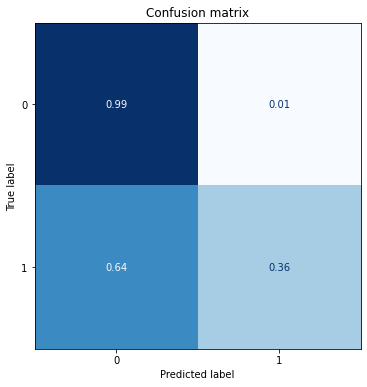

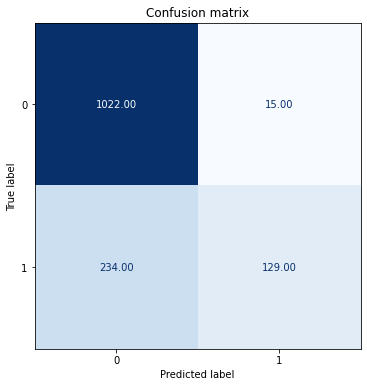

Random Forest 50 0.8278571428571428
              precision    recall  f1-score   support

           0       0.82      0.99      0.89      1037
           1       0.93      0.36      0.52       363

    accuracy                           0.83      1400
   macro avg       0.87      0.68      0.71      1400
weighted avg       0.85      0.83      0.80      1400



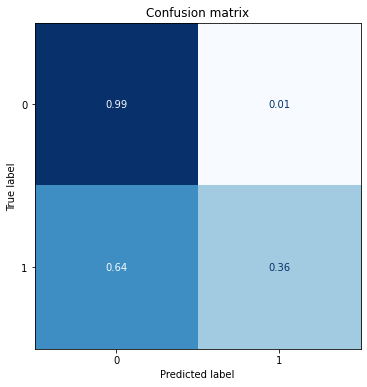

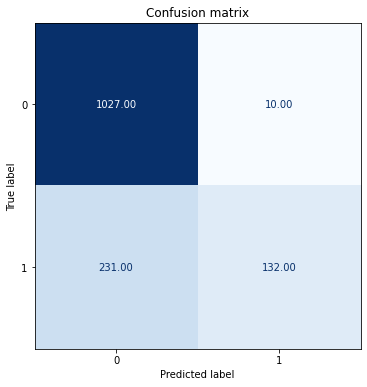

Random Forest 75 0.8214285714285714
              precision    recall  f1-score   support

           0       0.81      0.99      0.89      1037
           1       0.90      0.35      0.50       363

    accuracy                           0.82      1400
   macro avg       0.86      0.67      0.70      1400
weighted avg       0.84      0.82      0.79      1400



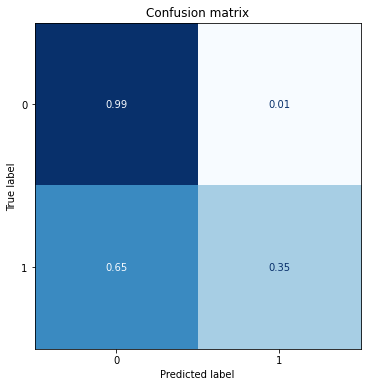

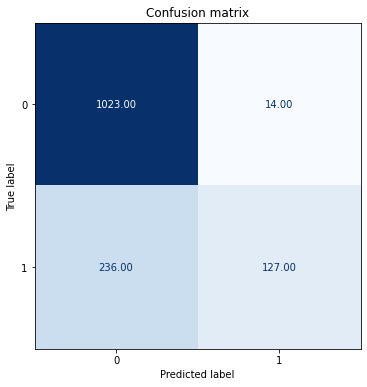

Random Forest 100 0.8221428571428572
              precision    recall  f1-score   support

           0       0.81      0.99      0.89      1037
           1       0.91      0.35      0.50       363

    accuracy                           0.82      1400
   macro avg       0.86      0.67      0.70      1400
weighted avg       0.84      0.82      0.79      1400



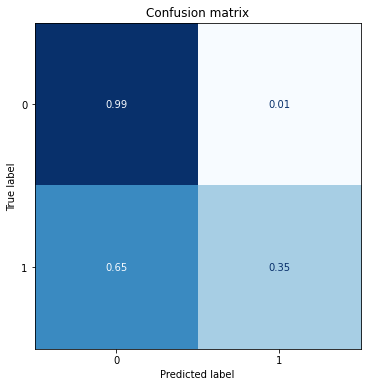

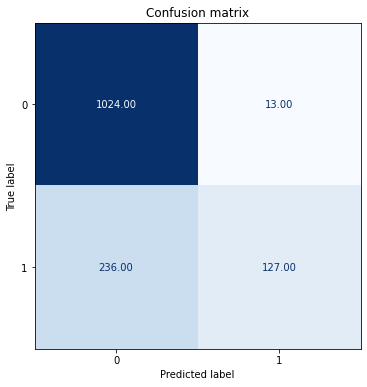

Random Forest 150 0.825
              precision    recall  f1-score   support

           0       0.81      0.99      0.89      1037
           1       0.92      0.36      0.51       363

    accuracy                           0.82      1400
   macro avg       0.87      0.67      0.70      1400
weighted avg       0.84      0.82      0.79      1400



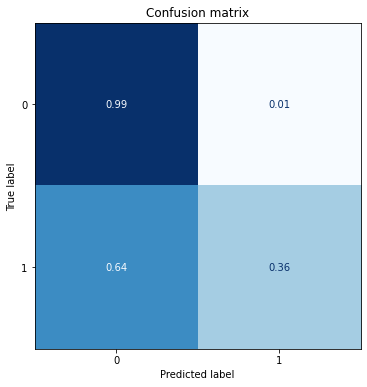

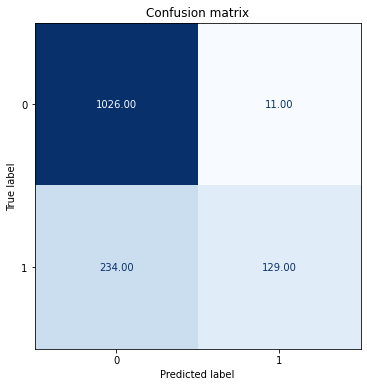

Random Forest 200 0.8264285714285714
              precision    recall  f1-score   support

           0       0.82      0.99      0.89      1037
           1       0.93      0.36      0.52       363

    accuracy                           0.83      1400
   macro avg       0.87      0.67      0.71      1400
weighted avg       0.84      0.83      0.80      1400



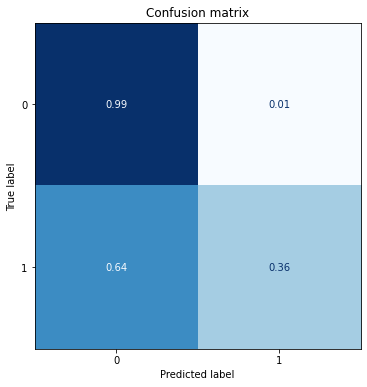

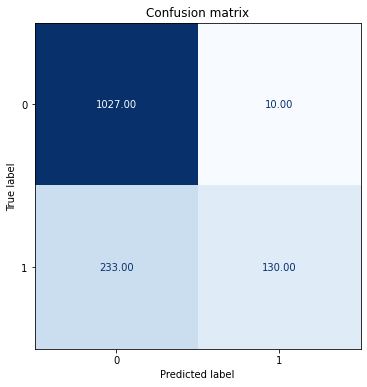

In [ ]:
# Random Forest classifier 

names = [
    "Random Forest 25",
    "Random Forest 50",
    "Random Forest 75",
    "Random Forest 100",
    "Random Forest 150",
    "Random Forest 200",

]

classifiers = [
    RandomForestClassifier(n_estimators=25),
    RandomForestClassifier(n_estimators=50),
    RandomForestClassifier(n_estimators=75),
    RandomForestClassifier(n_estimators=100),
    RandomForestClassifier(n_estimators=150),
    RandomForestClassifier(n_estimators=200),
]

overview_f1macro, myX_prob, myX_pred = test_classifiers(names, classifiers, overview_f1macro, myX_prob, myX_pred)


MLP 20 10 5 0.7785714285714286
              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1037
           1       0.59      0.49      0.53       363

    accuracy                           0.78      1400
   macro avg       0.71      0.68      0.69      1400
weighted avg       0.77      0.78      0.77      1400



/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


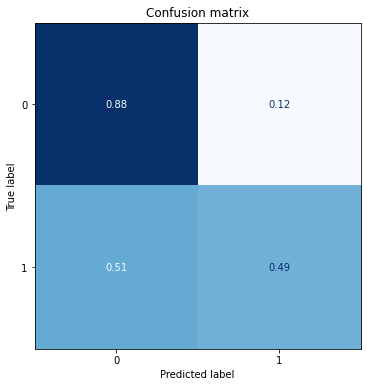

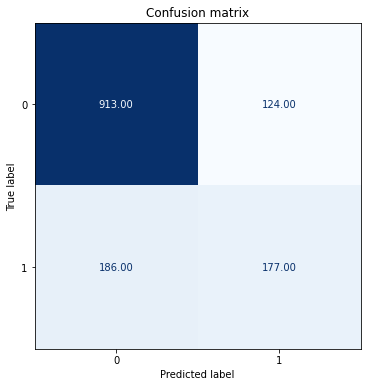

MLP 100 0.7935714285714286
              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1037
           1       0.63      0.50      0.56       363

    accuracy                           0.79      1400
   macro avg       0.73      0.70      0.71      1400
weighted avg       0.78      0.79      0.79      1400



/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


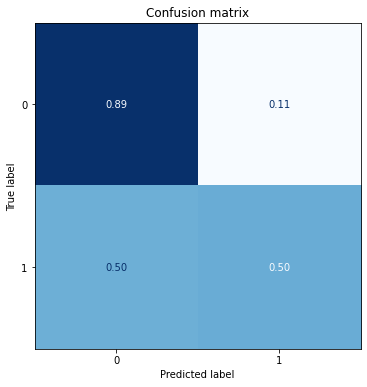

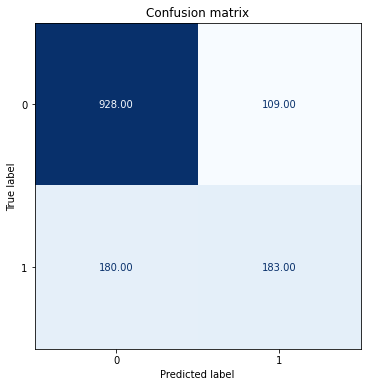

MLP 50 25 10 5 0.7742857142857142
              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1037
           1       0.58      0.49      0.53       363

    accuracy                           0.77      1400
   macro avg       0.70      0.68      0.69      1400
weighted avg       0.76      0.77      0.77      1400



/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


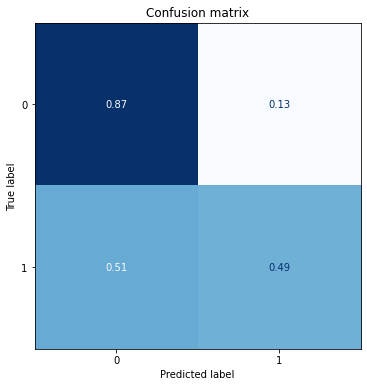

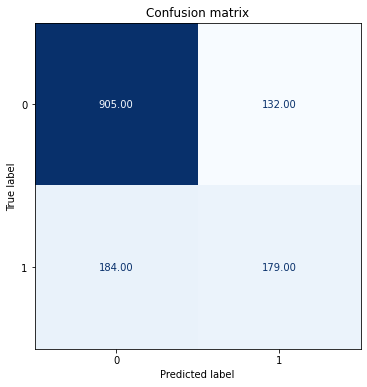

In [ ]:
# Multi-layer Perceptron classifier 

names = [
    "MLP 20 10 5",
    "MLP 100",
    "MLP 50 25 10 5",

]

classifiers = [
    MLPClassifier(hidden_layer_sizes=(20,10,5), max_iter=10),
    MLPClassifier(hidden_layer_sizes=(100), max_iter=10),
    MLPClassifier(hidden_layer_sizes=(50,25,10,5), max_iter=10),
]

overview_f1macro, myX_prob, myX_pred = test_classifiers(names, classifiers, overview_f1macro, myX_prob, myX_pred)


ComplementNB 0.7685714285714286
              precision    recall  f1-score   support

           0       0.79      0.95      0.86      1037
           1       0.63      0.26      0.37       363

    accuracy                           0.77      1400
   macro avg       0.71      0.60      0.61      1400
weighted avg       0.74      0.77      0.73      1400



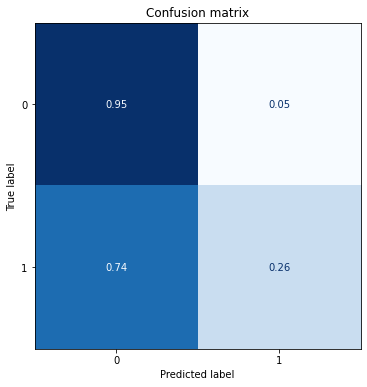

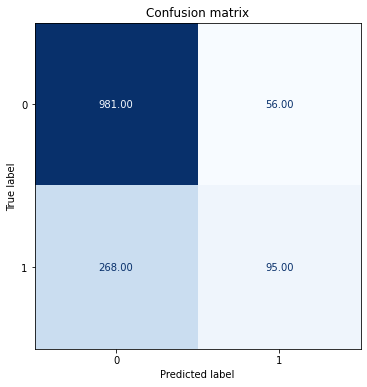

MulinomialNB 0.7514285714285714
              precision    recall  f1-score   support

           0       0.75      1.00      0.86      1037
           1       1.00      0.04      0.08       363

    accuracy                           0.75      1400
   macro avg       0.87      0.52      0.47      1400
weighted avg       0.81      0.75      0.65      1400



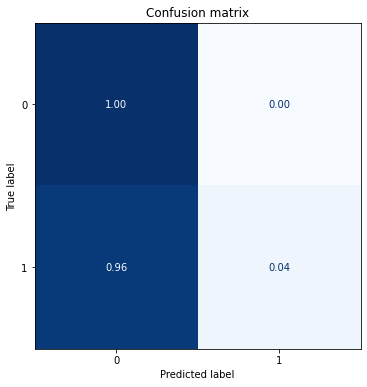

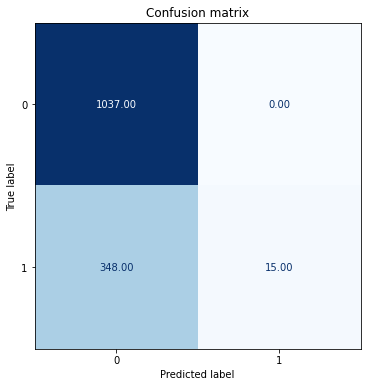

In [ ]:
# Bayes classifier

names = [
    "ComplementNB",
    "MulinomialNB",

]

classifiers = [
    ComplementNB(),
    MultinomialNB(),
]

overview_f1macro, myX_prob, myX_pred = test_classifiers(names, classifiers, overview_f1macro, myX_prob, myX_pred)



In [ ]:
myX_pred.to_csv("myX_pred.csv", index=False) 
myX_prob.to_csv("myX_prob.csv", index=False)

In [ ]:
myX_prob = pd.read_csv("myX_prob.csv") 
myX_pred = pd.read_csv("myX_pred.csv")
myX_prob.head()


,Unnamed: 0,Nearest Neighbors_class0,Linear SVM_class0,RBF SVM_class0,Decision Tree_class0,Random Forest_class0,AdaBoost_class0,LogisticRegression_class0,AdaBoost10_class0,AdaBoost20_class0,...,Random Forest 50_class0,Random Forest 75_class0,Random Forest 100_class0,Random Forest 150_class0,Random Forest 200_class0,MLP 20 10 5_class0,MLP 100_class0,MLP 50 25 10 5_class0,ComplementNB_class0,MulinomialNB_class0
0,0,1.0,0.691340,0.616706,1.0,0.74,0.504594,0.629957,0.520972,0.512370,...,0.70,0.746667,0.77,0.713333,0.770,0.795422,0.469371,0.910988,0.805202,0.928709
1,1,1.0,0.840302,0.922706,1.0,0.95,0.515609,0.892169,0.570419,0.537256,...,0.98,0.960000,0.95,0.933333,0.925,0.992523,0.928775,0.999135,0.628314,0.841961
2,2,1.0,0.843037,0.914407,1.0,0.95,0.510980,0.869437,0.547582,0.525721,...,0.96,0.920000,0.97,0.980000,0.980,0.999249,0.996452,0.999998,0.806150,0.929109
3,3,1.0,0.899065,0.945222,0.0,0.96,0.515609,0.910652,0.570419,0.537256,...,0.90,0.906667,0.90,0.886667,0.925,0.988726,0.952110,0.997294,0.600239,0.825543
4,4,1.0,0.857114,0.867144,0.0,0.73,0.504069,0.789967,0.547582,0.513029,...,0.82,0.800000,0.83,0.786667,0.865,0.759901,0.658201,0.444728,0.834714,0.940883


In [ ]:
plot_confusion_matrix(true_y, pred_y,  labels, "true")
plot_confusion_matrix(true_y, pred_y,   labels, None)
print(classification_report(true_y, pred_y))

In [ ]:
df.head()

In [ ]:
myX.head()

## Majority vote: Combine classifier

In [ ]:
# boolean array of values between pval and 1-pval
def correct_classified(y_true, y_pred_proba, pval):
    """
    args:
        y_true: vector of true labels
        y_pred_proba: vector of predicted probabilities
        pval: probability threshold
    returns:
        y_true: vector of true labels for values below pval or above 1-pval
        y_pred: vector of predicted labels for values below pval or above  1-pval
        y_pred_proba: vector of predicted probabilities for values below pval or above  1-pval
    """
    bool = np.logical_or(y_pred_proba < pval, y_pred_proba > 1-pval)
    y_true = y_true[bool]
    y_pred_proba = y_pred_proba[bool]
    y_pred = np.zeros(len(y_pred_proba))
    y_pred[y_pred_proba > 0.5] = 1
    
    print(classification_report(y_true, y_pred))
    plot_confusion_matrix(y_true, y_pred, labels, None)
    return(y_true, y_pred, y_pred_proba)



In [ ]:
correct_classified(df["label"], 1-df["probs_class0"], pval=0.05)


In [ ]:
clf = AdaBoostClassifier(n_estimators=50) 
clf.fit(tfidf_train_vectors, y_train)
proba = clf.predict_proba(tfidf_test_vectors)
correct_classified(y_test, proba[:,1], pval=0.49)


In [ ]:
clf = RandomForestClassifier()
clf.fit(tfidf_train_vectors, y_train)
proba = clf.predict_proba(tfidf_test_vectors)
correct_classified(y_test, proba[:,1], pval=0.1)


In [ ]:
np.mean(proba[:,0])

In [ ]:
names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Decision Tree",
    "Random Forest",
    "AdaBoost",
]

classifiers = [
    KNeighborsClassifier(),
    SVC(kernel="linear", C=0.025, probability=True),
    SVC(gamma=2, C=1, probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
]

myX = pd.DataFrame()
myX["distilbert"] = df["probs_class0"]
for name, clf in zip(names, classifiers):
    clf.fit(tfidf_train_vectors, y_train)
    proba = clf.predict_proba(tfidf_test_vectors)
    myX[name] = proba[:,0]

myX.head()	

In [ ]:
clf = AdaBoostClassifier()
clf.fit(myX, y_test)
ypred = clf.predict(myX)
print(classification_report(y_test, ypred))

## Meta-Learner



In [62]:
df_test = pd.read_csv("https://raw.githubusercontent.com/WiebkePetersen/hhuEDOS2023/main/additional%20dataframes/df_test.csv" , encoding="utf-8")
true_y = df_test["label"].values

In [65]:
df_test.head()

,Unnamed: 0,rewire_id,text,label,label_category,label_vector,probs_class0,predicted_label
0,0,sexism2022_english-1422,"Stupid white woman, liberal mind set is screwe...",1,2. derogation,2.2 aggressive and emotive attacks,0.465184,1
1,1,sexism2022_english-12593,"""Baby's in the cradle, Brother's on the town. ...",0,none,none,0.900418,0
2,2,sexism2022_english-17802,#VoteDemOut seditionist wanna be socialists ne...,0,none,none,0.970707,0
3,3,sexism2022_english-13656,"Naked outdoors topic, star to fav ))) [URL]",0,none,none,0.979545,0
4,4,sexism2022_english-9777,I will probably try to date both of the girls ...,0,none,none,0.674897,0


In [ ]:
myX_prob = pd.read_csv("myX_prob.csv")
myX_pred = pd.read_csv("myX_pred.csv")
myX_prob.head()


In [ ]:
true_y

In [ ]:
df = myX_prob
df["label"] = true_y

dev, test = train_test_split(df, test_size=0.3,)
y_dev = dev["label"]
y_test = test["label"]
myX_prob_dev = dev.drop("label", axis=1)
myX_prob_test = test.drop("label", axis=1)


myX_prob_dev.shape, myX_prob_test.shape

In [ ]:
myX_prob_dev.head()

In [ ]:
y_test

In [ ]:

clf = AdaBoostClassifier()

clf.fit(myX_prob_dev,y_dev)
ypred = clf.predict(myX_prob_test)
score = clf.score(myX_prob_test,y_test)
print(score)
print(classification_report(y_test, ypred))
labels = [0,1]
plot_confusion_matrix(y_test, ypred, labels, None)


In [ ]:
# Only distilbert
distprob_y = myX_prob_test["distilbert_class0"]
distprob_y = distprob_y.values

# list of 1 if distilbert prob > 0.5 else 0
dist_y = np.zeros(len(distprob_y))
dist_y[distprob_y < 0.5] = 1
print(classification_report(dist_y, ypred))
labels = [0,1]
plot_confusion_matrix(dist_y, ypred, labels, None)


## Run on dev data

In [ ]:
X_all = pd.concat([X_train, X_test], axis=0)
y_all = pd.concat([y_train, y_test], axis=0)

# dataframe from csv file
dev_df = pd.read_csv('data/Semeval23Task10/dev_task_a_entries.csv')
dev_df['text'] = dev_df['text'].apply(lambda x: clean_text(x))
X_dev = dev_df['text']

tfidf_vectorizer = TfidfVectorizer() 
tfidf_train_vectors = tfidf_vectorizer.fit_transform(X_all)
tfidf_test_vectors = tfidf_vectorizer.transform(X_dev)
clf = AdaBoostClassifier()
clf.fit(tfidf_train_vectors, y_all)
y_pred = clf.predict(tfidf_test_vectors)
dev_df["y_preds"] = y_pred

def int2str(num):
  if num == 0:
    return "not sexist"
  elif num == 1:
    return "sexist"

# create output file
dev_df["label_pred"] = dev_df["y_preds"].apply(int2str)
dev_df = dev_df.drop(["text","y_preds"], axis=1)
compression_opts = dict(method='zip',
                        archive_name='out.csv')  
dev_df.to_csv('out.zip', compression=compression_opts)
dev_df.head()

# Aggregate texts to larger text inputs 

Procedure: <br> 
Concatenate entries in the dataset to larger text units (1, 10 and 100 text blocks). 
Vectorize the text units and test it with different classifiers.


In [24]:
data_name = "Wiebke/SemEvalTask10_train_all_tasks"  # data set with already preprocessed texts
datadict = load_dataset(data_name)
#datadict = datadict.rename_column("label_sexist", "label")
#datadict = datadict.class_encode_column("label")
datadict.set_format(type='pandas')
mytrain = datadict['train'][:]
mytest = datadict['test'][:]
datadict.reset_format()

  0%|          | 0/2 [00:00<?, ?it/s]

In [14]:
mytrain['text'] = mytrain['text'].apply(lambda x: clean_text(x))
mytest['text'] = mytrain['text'].apply(lambda x: clean_text(x))

X_train = mytrain["text"]
X_test = mytest["text"]
y_train = mytrain["label"]
y_test = mytest["label"]


sexist_data = mytrain[mytrain["label"]== 1]
nonsexist_data = mytrain[mytrain["label"]==0]

In [15]:
mytrain

,rewire_id,text,label,label_category,label_vector
0,sexism2022_english-15060,people still stupid try appease violent savage...,0,none,none
1,sexism2022_english-8965,frantic woman matter cause trouble pain anxiet...,1,2. derogation,2.1 descriptive attacks
2,sexism2022_english-2320,yeah drink would good follow especially sit ne...,0,none,none
3,sexism2022_english-15637,ching chang ching choke dong fucking kek,0,none,none
4,sexism2022_english-747,"death child author enid blyton, th november ma...",0,none,none
...,...,...,...,...,...
12595,sexism2022_english-17903,hoky coky thats,0,none,none
12596,sexism2022_english-1944,regular photo kind risque might suggest someth...,1,3. animosity,3.2 immutable gender differences and gender st...
12597,sexism2022_english-14983,mom,0,none,none
12598,sexism2022_english-6857,"wow, admire woman much faith url",0,none,none


In [16]:
sexist_data.head()

,rewire_id,text,label,label_category,label_vector
1,sexism2022_english-8965,frantic woman matter cause trouble pain anxiet...,1,2. derogation,2.1 descriptive attacks
7,sexism2022_english-2643,sexist let transgendereds split skull woman op...,1,"1. threats, plans to harm and incitement",1.2 incitement and encouragement of harm
8,sexism2022_english-6283,user feminism today far cry suffragette susan ...,1,2. derogation,2.1 descriptive attacks
15,sexism2022_english-2991,"make money, earn but, ignore gal even money, s...",1,2. derogation,2.1 descriptive attacks
19,sexism2022_english-12650,throw woman prison let prisoner fun dy man bur...,1,"1. threats, plans to harm and incitement",1.2 incitement and encouragement of harm


In [107]:
sexist_data.shape, nonsexist_data.shape

((3035, 5), (9565, 5))

In [17]:
textblocks = pd.DataFrame(columns=["text","label"])

c=0
while c < sexist_data.shape[0]:
    sexist_text = " ".join(sexist_data[c:(c+10)]["text"])
    textblocks = pd.concat([textblocks, pd.DataFrame({"text": [sexist_text], "label": [1]})], ignore_index=True)
    c+=10
c=0
while c < nonsexist_data.shape[0]:
    nonsexist_text = " ".join(nonsexist_data[c:(c+10)]["text"])
    textblocks = pd.concat([textblocks, pd.DataFrame({"text": [nonsexist_text], "label": [0]})], ignore_index=True)
    c+=10


textblocks100 = pd.DataFrame(columns=["text","label"])

c=0
while c < sexist_data.shape[0]:
    sexist_text = " ".join(sexist_data[c:(c+100)]["text"])
    textblocks100 = pd.concat([textblocks100, pd.DataFrame({"text": [sexist_text], "label": [1]})], ignore_index=True)
    c+=100
c=0
while c < nonsexist_data.shape[0]:
    nonsexist_text = " ".join(nonsexist_data[c:(c+100)]["text"])
    textblocks100 = pd.concat([textblocks100, pd.DataFrame({"text": [nonsexist_text], "label": [0]})], ignore_index=True)
    c+=100

textblocks100.head()


,text,label
0,frantic woman matter cause trouble pain anxiet...,1
1,oh must one guy pay bitch fuck dare hillary ev...,1
2,"degree, white woman privileged group earth, te...",1
3,"please shoot her, also cringe worthy ball half...",1
4,"attacked first, problem mixon giving bitch tas...",1


In [18]:
textblocks100.shape

(127, 2)

In [19]:
# print text of first row
textblocks100["text"][0]


'frantic woman matter cause trouble pain anxiety frantic woman sexist let transgendereds split skull woman open sport user feminism today far cry suffragette susan b anthony today feminism emasculating men woman, find slut feminism disgusting make money, earn but, ignore gal even money, spend it, still stuck wife throw woman prison let prisoner fun dy man burned stake user man kill woman monster woman kill man wonder imagine responded way wonder thought second could possibly woman planet worth damn foolish good luck spending life slutting feminists, family court, too, divorce rape, making men drone withdrawal women, fatherhood family way bring men back table change family law divorce law thanks cell phone social media, woman taking lead accident say many u actually terrible, bitch pretty loud might surprised know kind woman hate popular rest u either always suspicious foids approach smile body language eye giddiness usually good way tell flirtiness ego boost girl doesnt touch thats goo

In [25]:
# Feature extraction per text block unit

tfidf_vectorizer1 = TfidfVectorizer()

tfidf_train_vectors1 = tfidf_vectorizer1.fit_transform(X_train)
tfidf_test_vectors1 = tfidf_vectorizer1.transform(X_test)

tfidf_vectorizer10 = TfidfVectorizer()
X_text = textblocks["text"]
tfidf_vectorizer10.fit(X_text)
tfidf_train_vectors10 = tfidf_vectorizer10.transform(X_train)
tfidf_test_vectors10 = tfidf_vectorizer10.transform(X_test)

tfidf_vectorizer100 = TfidfVectorizer()
X_text100 = textblocks100["text"]
tfidf_vectorizer100.fit(X_text100)
tfidf_train_vectors100 = tfidf_vectorizer100.transform(X_train)
tfidf_test_vectors100 = tfidf_vectorizer100.transform(X_test)



In [26]:
# Ada Boost Classifier

print("AdaBoostClassifier")
print("1 textblocks")
classifier = AdaBoostClassifier()
classifier.fit(tfidf_train_vectors1,y_train)
y_pred = classifier.predict(tfidf_test_vectors1)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test, y_pred, labels=[0,1]))

print("10 textblocks")
classifier = AdaBoostClassifier()
classifier.fit(tfidf_train_vectors10,y_train)
y_pred = classifier.predict(tfidf_test_vectors10)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test, y_pred, labels=[0,1]))

print("100 textblocks")
classifier = AdaBoostClassifier()
classifier.fit(tfidf_train_vectors100,y_train)
y_pred = classifier.predict(tfidf_test_vectors100)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test, y_pred, labels=[0,1]))



AdaBoostClassifier
1 textblocks
              precision    recall  f1-score   support

           0       0.74      0.88      0.80      1037
           1       0.25      0.12      0.16       363

    accuracy                           0.68      1400
   macro avg       0.49      0.50      0.48      1400
weighted avg       0.61      0.68      0.64      1400

[[911 126]
 [321  42]]
10 textblocks
              precision    recall  f1-score   support

           0       0.74      0.88      0.80      1037
           1       0.25      0.12      0.16       363

    accuracy                           0.68      1400
   macro avg       0.49      0.50      0.48      1400
weighted avg       0.61      0.68      0.63      1400

[[909 128]
 [321  42]]
100 textblocks
              precision    recall  f1-score   support

           0       0.74      0.87      0.80      1037
           1       0.25      0.12      0.16       363

    accuracy                           0.68      1400
   macro avg       0.

In [27]:
# Random Forest Classifier

print("RandomForestClassifier")
print("1 textblocks")
classifier = RandomForestClassifier()
classifier.fit(tfidf_train_vectors1,y_train)
y_pred = classifier.predict(tfidf_test_vectors1)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test, y_pred, labels=[0,1]))

print("10 textblocks")
classifier = RandomForestClassifier()
classifier.fit(tfidf_train_vectors10,y_train)
y_pred = classifier.predict(tfidf_test_vectors10)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test, y_pred, labels=[0,1]))

print("100 textblocks")
classifier = RandomForestClassifier()
classifier.fit(tfidf_train_vectors100,y_train)
y_pred = classifier.predict(tfidf_test_vectors100)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test, y_pred, labels=[0,1]))


RandomForestClassifier
1 textblocks
              precision    recall  f1-score   support

           0       0.74      0.76      0.75      1037
           1       0.27      0.25      0.26       363

    accuracy                           0.63      1400
   macro avg       0.51      0.51      0.51      1400
weighted avg       0.62      0.63      0.62      1400

[[786 251]
 [271  92]]
10 textblocks
              precision    recall  f1-score   support

           0       0.74      0.76      0.75      1037
           1       0.27      0.25      0.26       363

    accuracy                           0.63      1400
   macro avg       0.51      0.51      0.51      1400
weighted avg       0.62      0.63      0.62      1400

[[787 250]
 [271  92]]
100 textblocks
              precision    recall  f1-score   support

           0       0.74      0.76      0.75      1037
           1       0.27      0.25      0.26       363

    accuracy                           0.63      1400
   macro avg     

In [28]:
# Decision Tree Classifier

print("DecisionTreeClassifier")
print("1 textblocks")
classifier = DecisionTreeClassifier()
classifier.fit(tfidf_train_vectors1,y_train)
y_pred = classifier.predict(tfidf_test_vectors1)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test, y_pred, labels=[0,1]))


print("10 textblocks")
classifier = DecisionTreeClassifier()
classifier.fit(tfidf_train_vectors10,y_train)
y_pred = classifier.predict(tfidf_test_vectors10)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test, y_pred, labels=[0,1]))

print("100 textblocks")
classifier = DecisionTreeClassifier()
classifier.fit(tfidf_train_vectors100,y_train)
y_pred = classifier.predict(tfidf_test_vectors100)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test, y_pred, labels=[0,1]))


DecisionTreeClassifier
1 textblocks
              precision    recall  f1-score   support

           0       0.74      0.76      0.75      1037
           1       0.27      0.25      0.26       363

    accuracy                           0.63      1400
   macro avg       0.51      0.51      0.51      1400
weighted avg       0.62      0.63      0.62      1400

[[788 249]
 [271  92]]
10 textblocks
              precision    recall  f1-score   support

           0       0.74      0.76      0.75      1037
           1       0.27      0.26      0.26       363

    accuracy                           0.63      1400
   macro avg       0.51      0.51      0.51      1400
weighted avg       0.62      0.63      0.63      1400

[[788 249]
 [270  93]]
100 textblocks
              precision    recall  f1-score   support

           0       0.74      0.76      0.75      1037
           1       0.27      0.25      0.26       363

    accuracy                           0.63      1400
   macro avg     

In [29]:
# Logistic Regression

print("LogisticRegression")
print("1 textblocks")
classifier = LogisticRegression(max_iter=200)
classifier.fit(tfidf_train_vectors1,y_train)
y_pred = classifier.predict(tfidf_test_vectors1)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test, y_pred, labels=[0,1]))

print("10 textblocks")
classifier = LogisticRegression(max_iter=200)
classifier.fit(tfidf_train_vectors10,y_train)
y_pred = classifier.predict(tfidf_test_vectors10)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test, y_pred, labels=[0,1]))

print("100 textblocks")
classifier = LogisticRegression(max_iter=200)
classifier.fit(tfidf_train_vectors100,y_train)
y_pred = classifier.predict(tfidf_test_vectors100)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test, y_pred, labels=[0,1]))


LogisticRegression
1 textblocks
              precision    recall  f1-score   support

           0       0.74      0.90      0.81      1037
           1       0.27      0.10      0.15       363

    accuracy                           0.70      1400
   macro avg       0.51      0.50      0.48      1400
weighted avg       0.62      0.70      0.64      1400

[[937 100]
 [326  37]]
10 textblocks
              precision    recall  f1-score   support

           0       0.74      0.90      0.81      1037
           1       0.26      0.10      0.14       363

    accuracy                           0.69      1400
   macro avg       0.50      0.50      0.48      1400
weighted avg       0.62      0.69      0.64      1400

[[938  99]
 [328  35]]
100 textblocks
              precision    recall  f1-score   support

           0       0.74      0.90      0.81      1037
           1       0.26      0.10      0.14       363

    accuracy                           0.69      1400
   macro avg       0.

In [31]:


classifier = LogisticRegression()
classifier.fit(tfidf_train_vectors10,y_train)
y_pred = classifier.predict(tfidf_test_vectors10)
y_prob = classifier.predict_proba(tfidf_test_vectors10)
min(y_prob[:,1]), max(y_prob[:,1]), np.mean(y_prob[:,1])
yprob1 = y_prob[:,1]
y1 = yprob1[y_test==1]
y0 = yprob1[y_test==0]



In [ ]:
# plot in one histogram y1 sorted in red and y0 sorted in blue
plt.hist(y1, bins=100, color='red', alpha=0.5, label='y1')
plt.hist(y0, bins=100, color='blue', alpha=0.5, label='y0')
plt.legend(loc='upper right')
plt.show()

## Apply the same procedure with our augmented dataset 

For information on how we generated the dataset with semi-supervised learning, see Notebook 3.

In [33]:
data_name = "Wiebke/newtrain_reddit_gab_bert-base-casedepoch3"  # available on huggingface 
datadict = load_dataset(data_name)
datadict.set_format(type='pandas')
mytrain = datadict['train'][:]
mytest = datadict['test'][:]
datadict.reset_format()

mytrain['text'] = mytrain['text'].apply(lambda x: clean_text(x))
mytest['text'] = mytest['text'].apply(lambda x: clean_text(x))
 

X_train = mytrain["text"]
X_test = mytest["text"]
y_train = mytrain["label"]
y_test = mytest["label"]


sexist_data = mytrain[mytrain["label"]==1]
nonsexist_data = mytrain[mytrain["label"]==0]

Extracting data files:   0%|          | 0/2 [00:00<?, ?it/s]

Generating test split:   0%|          | 0/1400 [00:00<?, ? examples/s]

Generating train split:   0%|          | 0/204028 [00:00<?, ? examples/s]

Dataset parquet downloaded and prepared to /root/.cache/huggingface/datasets/Wiebke___parquet/Wiebke--newtrain_reddit_gab_bert-base-casedepoch3-0a2f731c822cfeb8/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec. Subsequent calls will reuse this data.


  0%|          | 0/2 [00:00<?, ?it/s]

In [ ]:
sexist_data.head()

In [ ]:
sexist_data.shape, nonsexist_data.shape

In [ ]:

textblocks = pd.DataFrame(columns=["text","label"])

c=0
while c < sexist_data.shape[0]:
    sexist_text = " ".join(sexist_data[c:(c+10)]["text"])
    textblocks = pd.concat([textblocks, pd.DataFrame({"text": [sexist_text], "label": [1]})], ignore_index=True)
    c+=10
c=0
while c < nonsexist_data.shape[0]:
    nonsexist_text = " ".join(nonsexist_data[c:(c+10)]["text"])
    textblocks = pd.concat([textblocks, pd.DataFrame({"text": [nonsexist_text], "label": [0]})], ignore_index=True)
    c+=10

textblocks = textblocks.sample(frac=1).reset_index(drop=True)
textblocks.shape

In [ ]:
textblocks100 = pd.DataFrame(columns=["text","label"])
# add rows to dataframe
c=0
while c < sexist_data.shape[0]:
    sexist_text = " ".join(sexist_data[c:(c+100)]["text"])
    textblocks100 = pd.concat([textblocks100, pd.DataFrame({"text": [sexist_text], "label": [1]})], ignore_index=True)
    c+=100
c=0
while c < nonsexist_data.shape[0]:
    nonsexist_text = " ".join(nonsexist_data[c:(c+100)]["text"])
    textblocks100 = pd.concat([textblocks100, pd.DataFrame({"text": [nonsexist_text], "label": [0]})], ignore_index=True)
    c+=100

# shuffle rows in textblocks100
textblocks100 = textblocks100.sample(frac=1).reset_index(drop=True)
textblocks100.shape

In [ ]:
tfidf_vectorizer1 = TfidfVectorizer()

tfidf_train_vectors1 = tfidf_vectorizer1.fit_transform(X_train)
tfidf_test_vectors1 = tfidf_vectorizer1.transform(X_test)

tfidf_vectorizer10 = TfidfVectorizer()
X_text = textblocks["text"]
tfidf_vectorizer10.fit(X_text)
tfidf_train_vectors10 = tfidf_vectorizer10.transform(X_train)
tfidf_test_vectors10 = tfidf_vectorizer10.transform(X_test)

tfidf_vectorizer100 = TfidfVectorizer()
X_text = textblocks100["text"]
tfidf_vectorizer100.fit(X_text)
tfidf_train_vectors100 = tfidf_vectorizer100.transform(X_train)
tfidf_test_vectors100 = tfidf_vectorizer100.transform(X_test)



In [ ]:
print("AdaBoostClassifier")

print("1 textblocks")
classifier = AdaBoostClassifier()
classifier.fit(tfidf_train_vectors1,y_train)
y_pred = classifier.predict(tfidf_test_vectors1)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test, y_pred, labels=[0,1]))

print("10 textblocks")
classifier = AdaBoostClassifier()
classifier.fit(tfidf_train_vectors10,y_train)
y_pred = classifier.predict(tfidf_test_vectors10)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test, y_pred, labels=[0,1]))


print("100 textblocks")
classifier = AdaBoostClassifier()
classifier.fit(tfidf_train_vectors100,y_train)
y_pred = classifier.predict(tfidf_test_vectors100)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test, y_pred, labels=[0,1]))

In [ ]:
print("LogisticRegression")


print("1 textblocks")
classifier = LogisticRegression(max_iter = 200)
classifier.fit(tfidf_train_vectors1,y_train)
y_pred = classifier.predict(tfidf_test_vectors1)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test, y_pred, labels=[0,1]))

print("10 textblocks")
classifier = LogisticRegression(max_iter = 200)
classifier.fit(tfidf_train_vectors10,y_train)
y_pred = classifier.predict(tfidf_test_vectors10)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test, y_pred, labels=[0,1]))

print("100 textblocks")
classifier = LogisticRegression(max_iter = 200)
classifier.fit(tfidf_train_vectors100,y_train)
y_pred = classifier.predict(tfidf_test_vectors100)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test, y_pred, labels=[0,1]))


### Without text cleaning

In [ ]:
data_name = "Wiebke/newtrain_reddit_gab_bert-base-casedepoch3"
datadict = load_dataset(data_name)
datadict.set_format(type='pandas')
mytrain = datadict['train'][:]
mytest = datadict['test'][:]
datadict.reset_format()

X_train = mytrain["text"]
X_test = mytest["text"]
y_train = mytrain["label"]
y_test = mytest["label"]


sexist_data = mytrain[mytrain["label"]==1]
nonsexist_data = mytrain[mytrain["label"]==0]

In [ ]:
sexist_data.head()

In [ ]:
sexist_data.shape, nonsexist_data.shape

In [ ]:
# make empty dataframe
import pandas as pd
textblocks = pd.DataFrame(columns=["text","label"])
# add rows to dataframe
c=0
while c < sexist_data.shape[0]:
    sexist_text = " ".join(sexist_data[c:(c+10)]["text"])
    textblocks = pd.concat([textblocks, pd.DataFrame({"text": [sexist_text], "label": [1]})], ignore_index=True)
    c+=10
c=0
while c < nonsexist_data.shape[0]:
    nonsexist_text = " ".join(nonsexist_data[c:(c+10)]["text"])
    textblocks = pd.concat([textblocks, pd.DataFrame({"text": [nonsexist_text], "label": [0]})], ignore_index=True)
    c+=10

textblocks = textblocks.sample(frac=1).reset_index(drop=True)
textblocks.shape

In [ ]:
textblocks100 = pd.DataFrame(columns=["text","label"])
# add rows to dataframe
c=0
while c < sexist_data.shape[0]:
    sexist_text = " ".join(sexist_data[c:(c+100)]["text"])
    textblocks100 = pd.concat([textblocks100, pd.DataFrame({"text": [sexist_text], "label": [1]})], ignore_index=True)
    c+=100
c=0
while c < nonsexist_data.shape[0]:
    nonsexist_text = " ".join(nonsexist_data[c:(c+100)]["text"])
    textblocks100 = pd.concat([textblocks100, pd.DataFrame({"text": [nonsexist_text], "label": [0]})], ignore_index=True)
    c+=100

# shuffle rows in textblocks100
textblocks100 = textblocks100.sample(frac=1).reset_index(drop=True)
textblocks100.shape

In [ ]:
tfidf_vectorizer1 = TfidfVectorizer()
tfidf_train_vectors1 = tfidf_vectorizer1.fit_transform(X_train)
tfidf_test_vectors1 = tfidf_vectorizer1.transform(X_test)

tfidf_vectorizer10 = TfidfVectorizer()
X_text = textblocks["text"]
tfidf_vectorizer10.fit(X_text)
tfidf_train_vectors10 = tfidf_vectorizer10.transform(X_train)
tfidf_test_vectors10 = tfidf_vectorizer10.transform(X_test)

tfidf_vectorizer100 = TfidfVectorizer()
X_text = textblocks100["text"]
tfidf_vectorizer100.fit(X_text)
tfidf_train_vectors100 = tfidf_vectorizer100.transform(X_train)
tfidf_test_vectors100 = tfidf_vectorizer100.transform(X_test)



In [ ]:
print("AdaBoostClassifier")

print("1 textblocks")
classifier = AdaBoostClassifier()
classifier.fit(tfidf_train_vectors1,y_train)
y_pred = classifier.predict(tfidf_test_vectors1)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test, y_pred, labels=[0,1]))

print("10 textblocks")
classifier = AdaBoostClassifier()
classifier.fit(tfidf_train_vectors10,y_train)
y_pred = classifier.predict(tfidf_test_vectors10)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test, y_pred, labels=[0,1]))


print("100 textblocks")
classifier = AdaBoostClassifier()
classifier.fit(tfidf_train_vectors100,y_train)
y_pred = classifier.predict(tfidf_test_vectors100)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test, y_pred, labels=[0,1]))

In [ ]:
print("LogisticRegression")


print("1 textblocks")
classifier = LogisticRegression(max_iter = 200)
classifier.fit(tfidf_train_vectors1,y_train)
y_pred = classifier.predict(tfidf_test_vectors1)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test, y_pred, labels=[0,1]))

print("10 textblocks")
classifier = LogisticRegression(max_iter = 200)
classifier.fit(tfidf_train_vectors10,y_train)
y_pred = classifier.predict(tfidf_test_vectors10)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test, y_pred, labels=[0,1]))

print("100 textblocks")
classifier = LogisticRegression(max_iter = 200)
classifier.fit(tfidf_train_vectors100,y_train)
y_pred = classifier.predict(tfidf_test_vectors100)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test, y_pred, labels=[0,1]))


### Test the model with balanced  augmented dataset
The dataset contains an equal amount of sexist and non-sexist data.

In [ ]:
data_name = "Wiebke/newtrain_reddit_gab_bert-base-casedepoch3_equal"
datadict = load_dataset(data_name)
datadict.set_format(type='pandas')
mytrain = datadict['train'][:]
mytest = datadict['test'][:]
datadict.reset_format()

mytrain['text'] = mytrain['text']#.apply(lambda x: clean_text(x))
mytest['text'] = mytest['text']#.apply(lambda x: clean_text(x))
 

X_train = mytrain["text"]
X_test = mytest["text"]
y_train = mytrain["label"]
y_test = mytest["label"]


sexist_data = mytrain[mytrain["label"]==1]
nonsexist_data = mytrain[mytrain["label"]==0]

In [ ]:
sexist_data.head()

In [ ]:
sexist_data.shape, nonsexist_data.shape

In [ ]:

textblocks = pd.DataFrame(columns=["text","label"])
# add rows to dataframe
c=0
while c < sexist_data.shape[0]:
    sexist_text = " ".join(sexist_data[c:(c+10)]["text"])
    textblocks = pd.concat([textblocks, pd.DataFrame({"text": [sexist_text], "label": [1]})], ignore_index=True)
    c+=10
c=0
while c < nonsexist_data.shape[0]:
    nonsexist_text = " ".join(nonsexist_data[c:(c+10)]["text"])
    textblocks = pd.concat([textblocks, pd.DataFrame({"text": [nonsexist_text], "label": [0]})], ignore_index=True)
    c+=10

textblocks = textblocks.sample(frac=1).reset_index(drop=True)

textblocks100 = pd.DataFrame(columns=["text","label"])
# add rows to dataframe
c=0
while c < sexist_data.shape[0]:
    sexist_text = " ".join(sexist_data[c:(c+100)]["text"])
    textblocks100 = pd.concat([textblocks100, pd.DataFrame({"text": [sexist_text], "label": [1]})], ignore_index=True)
    c+=100
c=0
while c < nonsexist_data.shape[0]:
    nonsexist_text = " ".join(nonsexist_data[c:(c+100)]["text"])
    textblocks100 = pd.concat([textblocks100, pd.DataFrame({"text": [nonsexist_text], "label": [0]})], ignore_index=True)
    c+=100

# shuffle rows in textblocks100
textblocks100 = textblocks100.sample(frac=1).reset_index(drop=True)


In [ ]:
tfidf_vectorizer1 = TfidfVectorizer()

tfidf_train_vectors1 = tfidf_vectorizer1.fit_transform(X_train)
tfidf_test_vectors1 = tfidf_vectorizer1.transform(X_test)

tfidf_vectorizer10 = TfidfVectorizer()
X_text = textblocks["text"]
tfidf_vectorizer10.fit(X_text)
tfidf_train_vectors10 = tfidf_vectorizer10.transform(X_train)
tfidf_test_vectors10 = tfidf_vectorizer10.transform(X_test)

tfidf_vectorizer100 = TfidfVectorizer()
X_text = textblocks100["text"]
tfidf_vectorizer100.fit(X_text)
tfidf_train_vectors100 = tfidf_vectorizer100.transform(X_train)
tfidf_test_vectors100 = tfidf_vectorizer100.transform(X_test)



In [ ]:
textblocks.head()

In [ ]:
y_text = textblocks["label"]
print(y_text.head())
y_text.value_counts(), len(y_text), sum(y_text.value_counts())


In [ ]:
# Use the classifier trained on text blocks to classify single texts 
X_text = textblocks["text"]
y_text = textblocks["label"]
y_text=y_text.astype('int')
tfidf_Xvector = tfidf_vectorizer10.fit_transform(X_text)
classifier = AdaBoostClassifier()
classifier.fit(tfidf_Xvector,y_text)
y_pred = classifier.predict(tfidf_test_vectors10)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test, y_pred, labels=[0,1]))
print("-----")

# Use the classifier trained on single texts to classify single texts
#tfidf_vectorizer10.fit(X_text)
classifier = AdaBoostClassifier()
classifier.fit(tfidf_train_vectors10,y_train)
y_pred = classifier.predict(tfidf_test_vectors10)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test, y_pred, labels=[0,1]))


In [ ]:
print("AdaBoostClassifier")

print("1 textblocks")
classifier = AdaBoostClassifier()
classifier.fit(tfidf_train_vectors1,y_train)
y_pred = classifier.predict(tfidf_test_vectors1)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test, y_pred, labels=[0,1]))

print("10 textblocks")
classifier = AdaBoostClassifier()
classifier.fit(tfidf_train_vectors10,y_train)
y_pred = classifier.predict(tfidf_test_vectors10)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test, y_pred, labels=[0,1]))


print("100 textblocks")
classifier = AdaBoostClassifier()
classifier.fit(tfidf_train_vectors100,y_train)
y_pred = classifier.predict(tfidf_test_vectors100)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test, y_pred, labels=[0,1]))

In [ ]:
print("LogisticRegression")


print("1 textblocks")
classifier = LogisticRegression(max_iter = 200)
classifier.fit(tfidf_train_vectors1,y_train)
y_pred = classifier.predict(tfidf_test_vectors1)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test, y_pred, labels=[0,1]))

print("10 textblocks")
classifier = LogisticRegression(max_iter = 200)
classifier.fit(tfidf_train_vectors10,y_train)
y_pred = classifier.predict(tfidf_test_vectors10)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test, y_pred, labels=[0,1]))

print("100 textblocks")
classifier = LogisticRegression(max_iter = 200)
classifier.fit(tfidf_train_vectors100,y_train)
y_pred = classifier.predict(tfidf_test_vectors100)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test, y_pred, labels=[0,1]))
